In [2]:
import pandas as pd
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [3]:
# Load the credit card transaction data
df = pd.read_csv('C:/Users/HP/Desktop/Stage_docs/code/data/data_balanceada.csv')
#df.drop('step', axis = 1, inplace = True)
df=df.iloc[:,1:]
df.head(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.0,0.0,751669.39,1017472.74,0,1,0,0,0,0,0


In [4]:
# Split the data into features and target variable
X = df.drop("isFraud", axis=1)
y = df["isFraud"]
#X = X.values
#y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the decision tree and random forest models
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Combine the models into an ensemble
ensemble_clf = VotingClassifier(estimators=[("dt", dt_clf), ("rf", rf_clf)], voting='hard')
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [7]:
# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Evaluate the ensemble model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.994826536822885


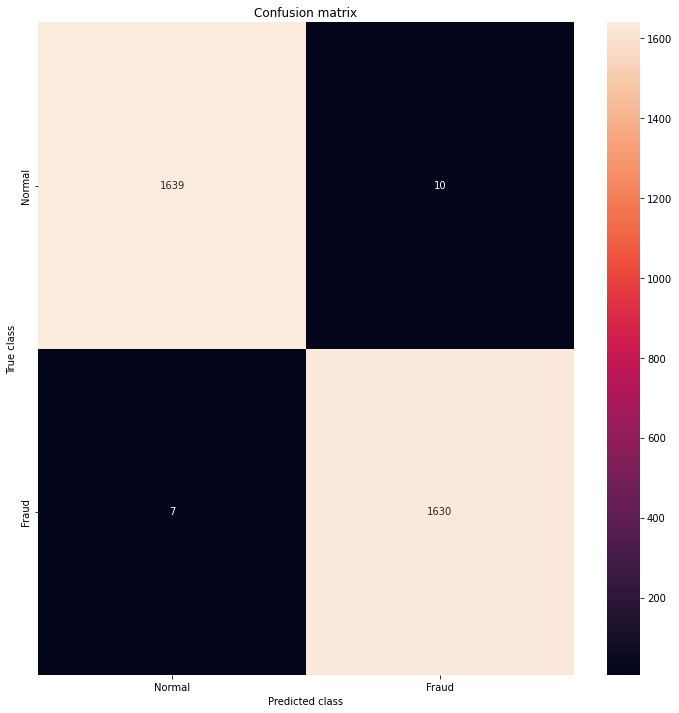

In [8]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [9]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(ensemble_clf, open("./models/D_ensemble.pkl","wb"))